In [1]:
import drops, utilities, wave_reflection
from scipy.optimize import fsolve
%matplotlib inline

In [522]:
t = linspace(0, 10, 1000)

soln, impacts = drops.ode_standalone(t, corral=False)

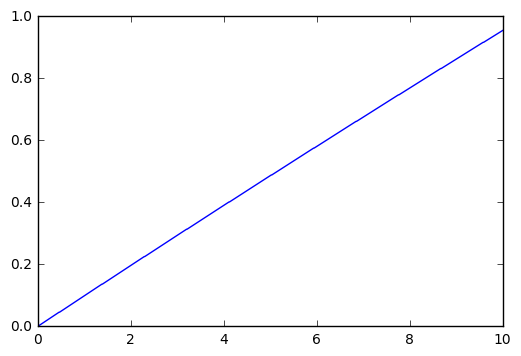

In [524]:
x = soln[:, 0, 0]
y = soln[:, 0, 1]
z = soln[:, 0, 2]

# utilities.plot_path(soln)
plt.plot(t, x)

In [488]:

print(drops.ρ, drops.ρ_a, drops.σ, drops.g, "rho, rho_a, sigma, g")
      
# Weber is jacked. Oh_a might be too low.
print(drops.ω, drops.ω_D, drops.We, drops.Bo, drops.Oh, "omega, omegaD, We, Bo, Oh")
print(drops.Oh_a, "Oh_a")


955 1.2 0.0206 9.81 rho, rho_a, sigma, g
628.3185307179587 603.0245786000177 4.520024271844661 0.06917264344660197 0.11416484740485773 omega, omegaD, We, Bo, Oh
0.00021006331922493826 Oh_a


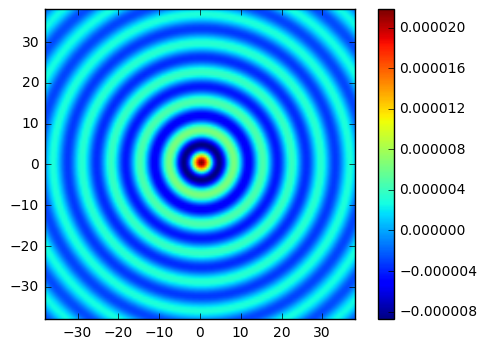

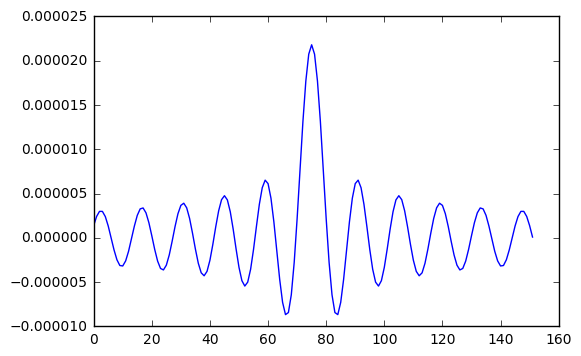

In [525]:
imp = drops.Impact(0., 0., 0., 5.)

utilities.wave_field(.1, [imp], resolution=2, corral=False)
plt.show()

x = utilities.wave_field(.1, [imp], resolution=2, corral=False, plot=False)
plt.plot(x[:, int(x.shape[1]/2)])

In [96]:
impact = drops.Impact(0, -65, -30, 1)
point = (-70, -30)


# solutions should be -.6969, 7.969,   and 6.5122,   -4.6465, per sympy. 
# Your eqs are right, so wtf?

drops.find_wall_collision(impact, point)


AttributeError: module 'drops' has no attribute 'find_wall_collision'

In [95]:
from numpy import arctan2

s = sqrt(2)/2

xi, yi = -s, s
xw, yw = -s, -s
xp, yp = .5, .5


# θiw = arctan2(yw - yi, xw - xi)  # angle from impact to wall
θiw = arctan2(yw - yi, xw - xi) % τ  # angle from impact to wall
θw = arctan2(yw, xw) % τ # normal to the wall


θwp = (2 * θw - θiw + τ/2) % τ # bounce angle
θwp = ((2 * θw - θiw) + τ/2) % τ # bounce angle  # tdo 

print(θiw/τ, θw/τ, θwp/τ,  sep='\n')

0.75
0.625
0.0


[2.2279473139602262, 4.3326034796149839] roots


[array([ -2.673 ,  37.9059]), array([ -5.9675, -37.5285])]

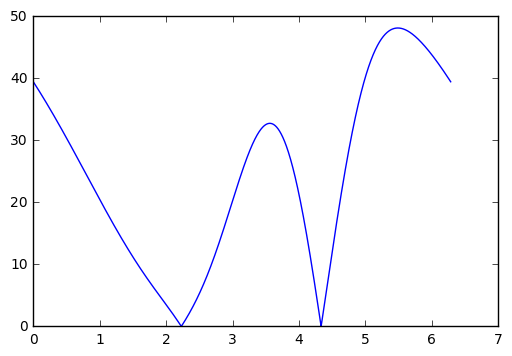

In [283]:
center = array([0, 0])

sample = array([-10., 25])
impact = array([15., 15.])

θ = linspace(0, τ, 5000)

cast = partial(wave_reflection.cast_ray, impact, sample, center)

dists = array(list(map(cast, θ)))
plt.plot(θ, dists)

list(wave_reflection.find_wall_collisions(impact, sample, center))

In [296]:
%timeit list(wave_reflection.find_reflection_points(impact, sample))

1000 loops, best of 3: 1.41 ms per loop


In [292]:
impacts = [drops.Impact(0, 0, 0, 1)]
#            drops.Impact(10, 100, 105, 1)]

# utilities.wave_field(20, impacts)
drops.net_surface_height(10, impacts, drops.Point(2, 2))

0.3545888279650812


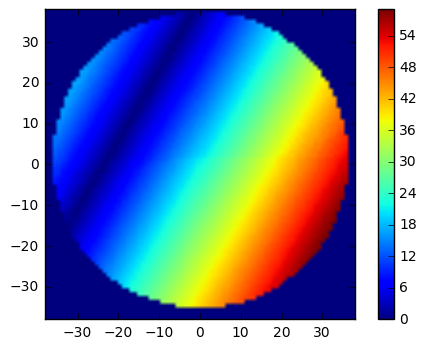

In [290]:
from itertools import product


θiw = 2.2279473139602279

print(θiw / τ)
utilities.reflection_field(impact, center, θiw)

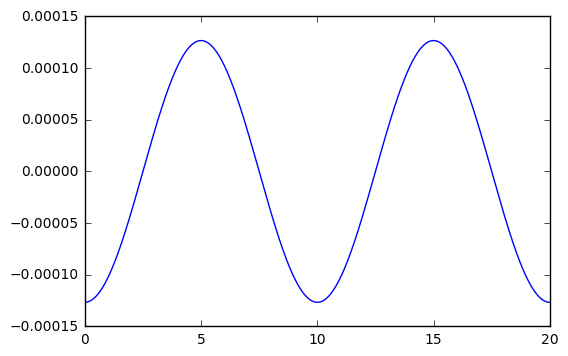

In [342]:
t = linspace(0, 20, 1000)
h = array([drops.surface_oscilation(t_)[0] for t_ in t])
plt.plot(t, h)
plt.show()